The Lyapunov exponent for this set of initial conditions is 0.9131345276984628


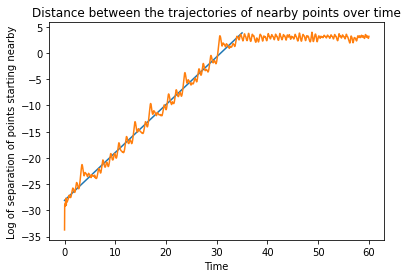

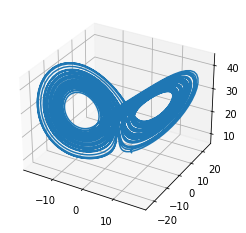

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

rho = 28
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z # Derivatives

state0 = [5, -1, 10]
t = np.arange( 0.0, 60, 0.01)

def state1(d):
    state1 = [state0[0]+d, state0[1]+d, state0[2]+d]
    return state1

states0 = odeint(f, state0, t)
states1 = odeint(f, state1(1e-15), t)
x = states1-states0

y = np.zeros(len(t))

for i in range(len(t)):
    y[i] = np.linalg.norm(x[i])

y0 = np.log(y)
y1 = y0[:3500]
t1 =  t[:3500]

m, b = np.polyfit(t1, y1, 1)
print('The Lyapunov exponent for this set of initial conditions is', m)

plt.plot(t1, m*t1+b)
plt.plot(t, y0)
plt.title('Distance between the trajectories of nearby points over time')
plt.ylabel('Log of separation of points starting nearby')
plt.xlabel('Time')
plt.show()

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states0[:, 0], states0[:, 1], states0[:, 2])
#ax.plot(states1[:, 0], states1[:, 1], states1[:, 2])
plt.draw()
plt.show()